In [1]:
import sys
sys.path.append("..")

In [2]:
from prometheus.detector import make_grid, Medium

## Make a ice-based detector with strings on a orthogonal grid

In [22]:
# Number of strings per side
n_per_side = 9
# Spacing in meters between strings
string_spacing = 120
# Number of OMs per string
oms_per_string = 60
# Distance between OMs on same string in meters
om_spacing = 15
# z-coordinate of the center of the detector
z_cent = -2000
# Medium in which the detector is embedded
medium = Medium.ICE

ice_det = make_grid(
    n_per_side,
    string_spacing,
    oms_per_string,
    oms_per_string,
    z_cent,
    medium
)

print(f"The detector is instrumented in {ice_det.medium}")
print(f"The detector has {len(ice_det.modules)} OMs")
print(f"The center of the detector is at {ice_det.module_coords.mean(axis=0)}")

The detector is instrumented in Medium.ICE
The detector has 4860 OMs
The center of the detector is at [    0.     0. -2000.]


## Save this to a geofile

In [26]:
ice_det.to_geo("../resources/geofiles/demo_ice.geo")

## Reload to detector and make sure it is identical

In [28]:
from prometheus.detector import detector_from_geo

det2 = detector_from_geo("../resources/geofiles/demo_ice.geo")

keys = [module.key for module in ice_det.modules]
keys2 = [module.key for module in det2.modules]

matched = True
for key in keys:
    if not all(ice_det[key].pos==det2[key].pos):
        matched = False
        
print(f"All the keys from the original detector match the saved version: {matched}")

matched = True
for key in keys2:
    if not all(ice_det[key].pos==det2[key].pos):
        matched = False
print(f"All the keys from the saved detector match the original version: {matched}")

print(f"The media are the same: {ice_det.medium==det2.medium}")

All the keys from the original detector match the saved version: True
All the keys from the saved detector match the original version: True
The media are the same: True


## Make a water-based detector on a hexagonal grid

In [29]:
from prometheus.detector import make_hex_grid

In [30]:
# Number of strings per side
n_per_side = 6
# Spacing in meters between strings
string_spacing = 120
# Number of OMs per string
oms_per_string = 60
# Distance between OMs on same string in meters
om_spacing = 15
# z-coordinate of the center of the detector
z_cent = -2500
# Medium in which the detector is embedded
medium = Medium.WATER

water_det = make_hex_grid(
    n_per_side,
    string_spacing,
    oms_per_string,
    om_spacing,
    z_cent,
    medium
)

print(f"The detector is instrumented in {water_det.medium}")
print(f"The detector has {len(water_det.modules)} OMs")
print(f"The center of the detector is at {water_det.module_coords.mean(axis=0)}")

The detector is instrumented in Medium.WATER
The detector has 4800 OMs
The center of the detector is at [ 0.00000000e+00 -5.30538576e-15 -2.50000000e+03]


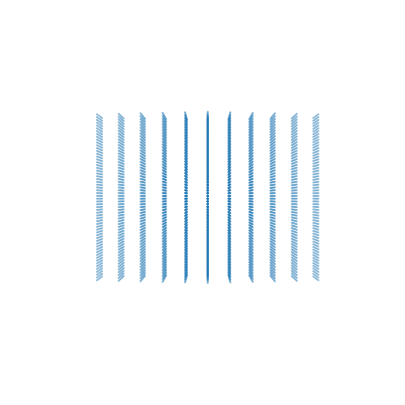

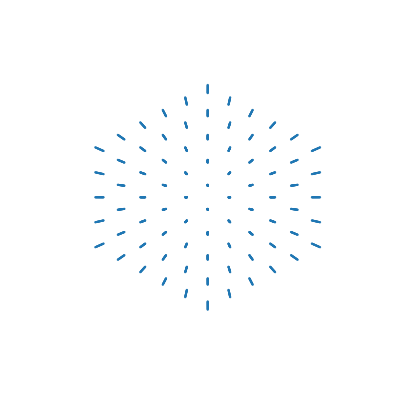

In [31]:
water_det.display()
water_det.display(elevation_angle=3.14159/2)

## Make a denser sub-detector in the middle

In [32]:
# Number of strings per side
n_per_side = 3
# Spacing in meters between strings
string_spacing = 30
# Number of OMs per string
oms_per_string = 60
# Distance between OMs on same string in meters
om_spacing = 5
# z-coordinate of the center of the detector
z_cent = -2200
# Medium in which the detector is embedded
medium = Medium.WATER

sub_det = make_hex_grid(
    n_per_side,
    string_spacing,
    oms_per_string,
    om_spacing,
    z_cent,
    medium
)

print(f"The subdetector is instrumented in {sub_det.medium.name}")
print(f"The subdetector has {len(sub_det.modules)} OMs")
print(f"The center of the subdetector is at {sub_det.module_coords.mean(axis=0)}")

The subdetector is instrumented in WATER
The subdetector has 840 OMs
The center of the subdetector is at [ 0.0000000e+00 -5.2444821e-16 -2.2000000e+03]


In [36]:
full_det = water_det + sub_det
full_det.to_geo("../resources/geofiles/demo_water.geo")

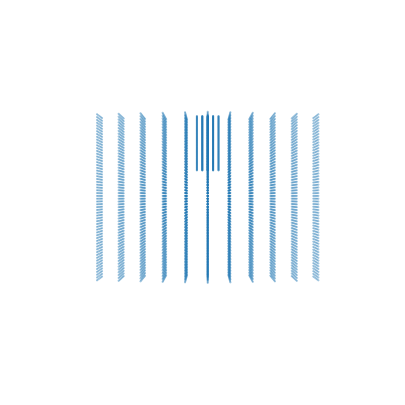

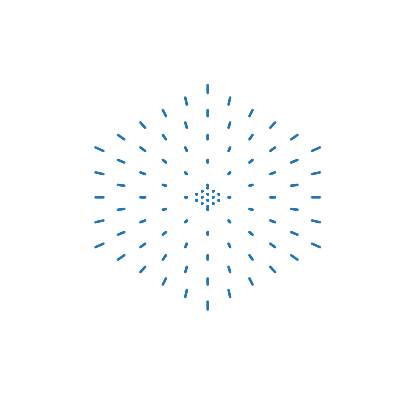

In [34]:
full_det.display()
full_det.display(elevation_angle=3.14159/2)

## You can't add together detectors that don't share a medium

In [35]:
mixed_det = ice_det + water_det

ValueError: Cannot combine detectors that are in different media